# <span style="color:darkorange"> Stationaire tijdsreeksen opdracht opgave

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline
plt.style.use('seaborn')
import numpy as np
sns.set_style("darkgrid")

## <span style="color:deeppink"> Vraag 1 - ziektegevallen </span>

Lees het bestand `zieken.csv` in, gebruik de eerste kolom als index

In [66]:
df = pd.read_csv('data/zieken.csv', index_col='Dag')
df

,Aantal zieken
Dag,
1,9
2,12
3,12
4,19
5,16
...,...
86,5
87,6
88,8


Stel de data voor met een passende grafiek die duidelijk het verloop van het aantal zieken per dag weergeeft.  

Text(0.5, 1.0, 'zieken per dag')

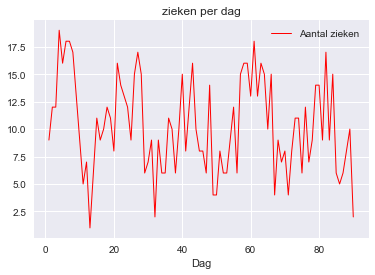

In [67]:
df.plot(color='red', linewidth=1, figsize=(6,4))
plt.title('zieken per dag')

Ga na via de trendlijn of er al dan niet sprake is van een stationaire tijdreeks.

Intercept = 11.571285892634208
Richtingcoef = -0.02818454953286414
We zien dat er een lichte daling zit in het aantal zieken


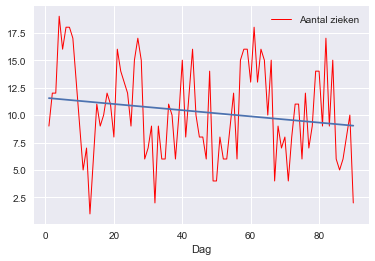

In [68]:
from sklearn.linear_model import LinearRegression

x = df.index.values
y = df['Aantal zieken'].values

l = LinearRegression()
l.fit(x.reshape(-1,1),y)

print(f'Intercept = {l.intercept_}')
print(f'Richtingcoef = {l.coef_[0]}')

df.plot(color='red', linewidth=1, figsize=(6,4))
sns.lineplot(x=x,y=l.predict(x.reshape(-1,1)))
print('We zien dat er een lichte daling zit in het aantal zieken')

Gebruik autocorrelatie om patronen te detecteren. Is er periodiciteit? Met andere woorden zijn er patronen die zich constant herhalen? Zo ja, hoe lang duurt zo een patroon?

Hier zien we een herhalend patroon


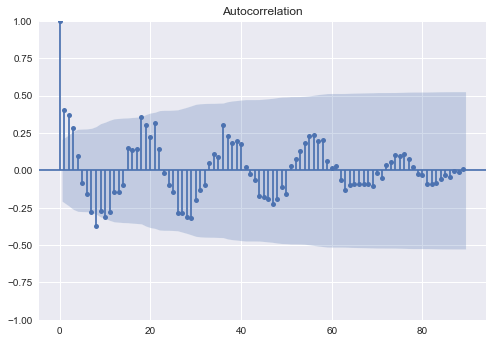

In [69]:
fig = plot_acf(df['Aantal zieken'],lags=len(df)-1)
print('Hier zien we een herhalend patroon')

Vergelijk onderstaande voorspellingsmethodes in termen van de MAE (Mean Absolute Error) en de MAPE (Mean Absolute Percentage Error).
- Voorspelde waarde is de huidige waarde
- Voorspelde waarde is het 3 punts moving average
- Voorspelde waarde is het 5 punts moving average
- Voorspelde waarde is het 10 punts moving average
- Voorspelde waarde via exponentiële demping, zoek de optimale alpha.


In [70]:
df['Vorige'] = df['Aantal zieken'].shift(1)
df['MA_3'] = df['Aantal zieken'].rolling(3).mean().shift(1)
df['MA_5'] = df['Aantal zieken'].rolling(5).mean().shift(1)
df['MA_10'] = df['Aantal zieken'].rolling(10).mean().shift(1)
df['exp_demping'] = df['Aantal zieken'].ewm(alpha=0.494, adjust=False).mean().shift(1)

df['ABS_MA_3'] = abs(df['Aantal zieken']-df['MA_3'])
df['ABS_MA_5'] = abs(df['Aantal zieken']-df['MA_5'])
df['ABS_MA_10'] = abs(df['Aantal zieken']-df['MA_10'])
df['ABS_Vorige'] = abs(df['Aantal zieken']-df['Vorige'])
df['ABS_exp_demping'] = abs(df['Aantal zieken']-df['exp_demping'])

df['PROC_MA3'] = (df['ABS_MA_3'] /df['Aantal zieken'])*100
df['PROC_MA5'] = (df['ABS_MA_5'] /df['Aantal zieken'])*100
df['PROC_MA10'] = (df['ABS_MA_10'] /df['Aantal zieken'])*100
df['PROC_exp'] = (df['ABS_exp_demping'] /df['Aantal zieken'])*100
df['PROC_vorige'] = (df['ABS_Vorige'] /df['Aantal zieken'])*100

stap = 1e-3
alphas = np.arange(start=0+stap,stop=1+stap,step=stap)
df2 = pd.DataFrame()
mae=[]

for alpha in alphas[0:]:
    expo = []
    expo = df['Aantal zieken'].ewm(alpha=alpha, adjust=False).mean().shift()
    mae.append(abs(df['Aantal zieken']-expo).mean())

df2['mae'] = mae
df2.set_index(alphas, inplace=True)
df2.head()
minimum_mae = df2['mae'].min()
print(f"De laagste is {df2['mae'].min()}")
print("index: ", df2[df2['mae'] == minimum_mae].index[0])

print(f"absoluut: ma3 {df['ABS_MA_3'].mean()} procentueel: {df['PROC_MA3'].mean()}")
print(f"absoluut: ma5 {df['ABS_MA_5'].mean()} procentueel: {df['PROC_MA5'].mean()}")
print(f"absoluut: ma10 {df['ABS_MA_10'].mean()} procentueel: {df['PROC_MA10'].mean()}")
print(f"absoluut: exp {df['ABS_exp_demping'].mean()} procentueel: {df['PROC_exp'].mean()}")
print(f"absoluut: vorige {df['ABS_Vorige'].mean()} procentueel: {df['PROC_vorige'].mean()}")
df

De laagste is 3.308328389653638
index:  0.494
absoluut: ma3 3.360153256704982 procentueel: 50.42663114951468
absoluut: ma5 3.6 procentueel: 58.484778447235186
absoluut: ma10 3.9574999999999996 procentueel: 70.64339011682762
absoluut: exp 3.308328389653638 procentueel: 51.08707149364628
absoluut: vorige 3.696629213483146 procentueel: 55.01327894381952


,Aantal zieken,Vorige,MA_3,MA_5,MA_10,exp_demping,ABS_MA_3,ABS_MA_5,ABS_MA_10,ABS_Vorige,ABS_exp_demping,PROC_MA3,PROC_MA5,PROC_MA10,PROC_exp,PROC_vorige
Dag,,,,,,,,,,,,,,,,
1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,9.0,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,3.0,3.000000,NaN,NaN,NaN,25.000000,25.000000
3,12,12.0,NaN,NaN,NaN,10.482000,NaN,NaN,NaN,0.0,1.518000,NaN,NaN,NaN,12.650000,0.000000
4,19,12.0,11.000000,NaN,NaN,11.231892,8.000000,NaN,NaN,7.0,7.768108,42.105263,NaN,NaN,40.884779,36.842105
5,16,19.0,14.333333,NaN,NaN,15.069337,1.666667,NaN,NaN,3.0,0.930663,10.416667,NaN,NaN,5.816642,18.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,5,6.0,10.000000,11.2,11.2,9.651060,5.000000,6.2,6.2,1.0,4.651060,100.000000,124.000000,124.0,93.021203,20.000000
87,6,5.0,8.666667,10.4,10.5,7.353436,2.666667,4.4,4.5,1.0,1.353436,44.444444,73.333333,75.0,22.557274,16.666667
88,8,6.0,5.666667,8.2,10.4,6.684839,2.333333,0.2,2.4,2.0,1.315161,29.166667,2.500000,30.0,16.439515,25.000000


Visualiseer de geteste methodes samen met het aantal zieken in 1 grafiek.

Text(0.5, 1.0, 'Alle methodes op 1 grafiek')

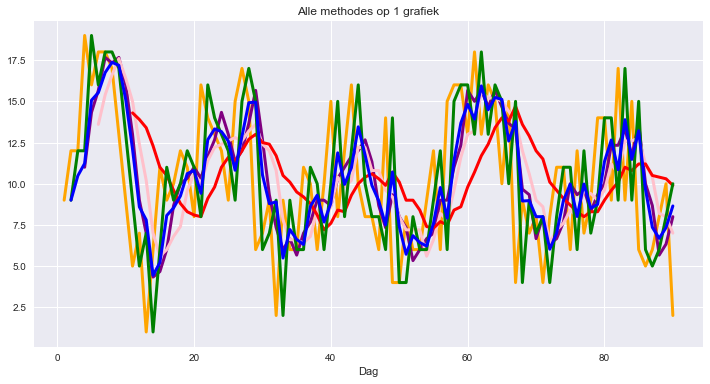

In [71]:
df['Aantal zieken'].plot(color='orange', linewidth=3, figsize=(12,6))
df['MA_3'].plot(color = 'purple', linewidth=3)
df['MA_5'].plot(color = 'pink', linewidth=3)
df['MA_10'].plot(color = 'red', linewidth=3)
df['Vorige'].plot(color = 'green', linewidth=3)
df['exp_demping'].plot(color = 'blue', linewidth=3)
plt.title('Alle methodes op 1 grafiek')

Welke methode geniet jouw voorkeur om mee te voorspellen? Argumenteer waarom.

In [72]:
print(f'De bestse keuze hier is exp demping')

De bestse keuze hier is exp demping


## <span style="color:deeppink"> Vraag 2 - Zonnepanelen </span>

Lees het bestand `zonnepanelen.csv` in, gebruik de eerste kolom als index

In [73]:
df = pd.read_csv('data/zonnepanelen.csv', index_col='Tijdstip')
df

,Elec_kWh
Tijdstip,
0,15.1
1,7.4
2,5.8
3,4.9
4,11.7
...,...
2943,12.0
2944,13.0
2945,13.0


Stel de data voor met een passende grafiek die duidelijk het verloop van de hoeveelheid elektriciteit opgewekt en verbruikt weergeeft.

Text(0.5, 1.0, 'Elec_kWh')

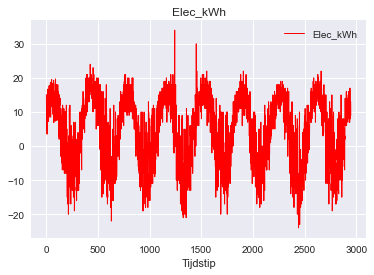

In [74]:
df.plot(color='red', linewidth=1, figsize=(6,4))
plt.title('Elec_kWh')

Ga na via de trendlijn of er al dan niet sprake is van een stationaire tijdreeks

Intercept = 5.74161753886629
Richtingcoef = -0.000829049182453518
We zien dat er een lichte daling in de grafiek zit


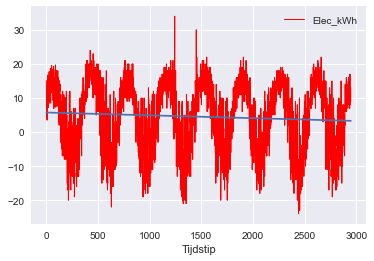

In [75]:
from sklearn.linear_model import LinearRegression

x = df.index.values
y = df['Elec_kWh'].values

l = LinearRegression()
l.fit(x.reshape(-1,1),y)

print(f'Intercept = {l.intercept_}')
print(f'Richtingcoef = {l.coef_[0]}')

df.plot(color='red', linewidth=1, figsize=(6,4))
sns.lineplot(x=x,y=l.predict(x.reshape(-1,1)))
print('We zien dat er een lichte daling in de grafiek zit')

Gebruik autocorrelatie om patronen te detecteren. Is er periodiciteit? Met andere woorden zijn er patronen die zich constant herhalen? Zo ja, hoelang duurt zo een patroon(ongeveer)?

Hier zien we een herhalend patroon


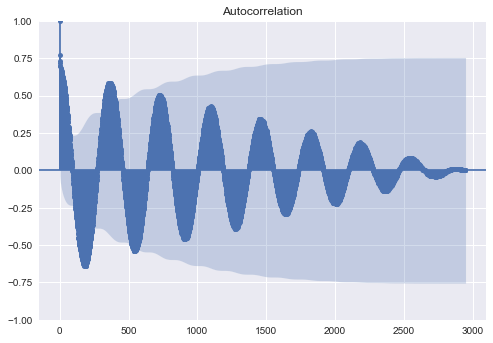

In [76]:
fig = plot_acf(df['Elec_kWh'],lags=len(df)-1)
print('Hier zien we een herhalend patroon')

Vergelijk onderstaande voorspellingsmethodes in termen van de MAE (Mean Absolute Error).
- Voorspelde waarde is de huidige waarde
- Voorspelde waarde is het 10 punts moving average
- Voorspelde waarde is het 20 punts moving average
- Voorspelde waarde is het 50 punts moving average
- Voorspelde waarde via exponentiële demping, zoek de optimale alpha.

In [77]:
df['Vorige'] = df['Elec_kWh'].shift(1)
df['MA_10'] = df['Elec_kWh'].rolling(3).mean().shift(1)
df['MA_20'] = df['Elec_kWh'].rolling(5).mean().shift(1)
df['MA_50'] = df['Elec_kWh'].rolling(10).mean().shift(1)
df['exp_demping'] = df['Elec_kWh'].ewm(alpha=0.23500000000000001, adjust=False).mean().shift(1)

df['ABS_MA_10'] = abs(df['Elec_kWh']-df['MA_10'])
df['ABS_MA_20'] = abs(df['Elec_kWh']-df['MA_20'])
df['ABS_MA_50'] = abs(df['Elec_kWh']-df['MA_50'])
df['ABS_Vorige'] = abs(df['Elec_kWh']-df['Vorige'])
df['ABS_exp_demping'] = abs(df['Elec_kWh']-df['exp_demping'])

df['PROC_MA10'] = (df['ABS_MA_10'] /df['Elec_kWh'])*100
df['PROC_MA20'] = (df['ABS_MA_20'] /df['Elec_kWh'])*100
df['PROC_MA50'] = (df['ABS_MA_50'] /df['Elec_kWh'])*100
df['PROC_exp'] = (df['ABS_exp_demping'] /df['Elec_kWh'])*100
df['PROC_vorige'] = (df['ABS_Vorige'] /df['Elec_kWh'])*100

stap = 1e-3
alphas = np.arange(start=0+stap,stop=1+stap,step=stap)
df2 = pd.DataFrame()
mae=[]

for alpha in alphas[0:]:
    expo = []
    expo = df['Elec_kWh'].ewm(alpha=alpha, adjust=False).mean().shift()
    mae.append(abs(df['Elec_kWh']-expo).mean())

df2['mae'] = mae
df2.set_index(alphas, inplace=True)
df2.head()
minimum_mae = df2['mae'].min()
print(f"De laagste is {df2['mae'].min()}")
print("index: ", df2[df2['mae'] == minimum_mae].index[0])

print(f"absoluut: ma10 {df['ABS_MA_10'].mean()} procentueel: {df['PROC_MA10'].mean()}")
print(f"absoluut: ma20 {df['ABS_MA_20'].mean()} procentueel: {df['PROC_MA20'].mean()}")
print(f"absoluut: ma50 {df['ABS_MA_50'].mean()} procentueel: {df['PROC_MA50'].mean()}")
print(f"absoluut: exp {df['ABS_exp_demping'].mean()} procentueel: {df['PROC_exp'].mean()}")
print(f"absoluut: vorige {df['ABS_Vorige'].mean()} procentueel: {df['PROC_vorige'].mean()}")
df

De laagste is 4.231246003570098
index:  0.23500000000000001
absoluut: ma10 4.471341256366723 procentueel: inf
absoluut: ma20 4.35813795446823 procentueel: inf
absoluut: ma50 4.379795779441797 procentueel: inf
absoluut: exp 4.231246003570098 procentueel: inf
absoluut: vorige 4.9678656260604 procentueel: inf


,Elec_kWh,Vorige,MA_10,MA_20,MA_50,exp_demping,ABS_MA_10,ABS_MA_20,ABS_MA_50,ABS_Vorige,ABS_exp_demping,PROC_MA10,PROC_MA20,PROC_MA50,PROC_exp,PROC_vorige
Tijdstip,,,,,,,,,,,,,,,,
0,15.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,15.1,NaN,NaN,NaN,15.100000,NaN,NaN,NaN,7.7,7.700000,NaN,NaN,NaN,104.054054,104.054054
2,5.8,7.4,NaN,NaN,NaN,13.290500,NaN,NaN,NaN,1.6,7.490500,NaN,NaN,NaN,129.146552,27.586207
3,4.9,5.8,9.433333,NaN,NaN,11.530233,4.533333,NaN,NaN,0.9,6.630232,92.517007,NaN,NaN,135.310867,18.367347
4,11.7,4.9,6.033333,NaN,NaN,9.972128,5.666667,NaN,NaN,6.8,1.727872,48.433048,NaN,NaN,14.768138,58.119658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,12.0,12.0,11.000000,11.6,10.4,11.067582,1.000000,0.4,1.6,0.0,0.932418,8.333333,3.333333,13.333333,7.770148,0.000000
2944,13.0,12.0,12.333333,12.4,10.5,11.286700,0.666667,0.6,2.5,1.0,1.713300,5.128205,4.615385,19.230769,13.179227,7.692308
2945,13.0,13.0,12.333333,11.6,10.8,11.689326,0.666667,1.4,2.2,0.0,1.310674,5.128205,10.769231,16.923077,10.082109,0.000000


Visualiseer de geteste methodes samen met het verbruik in 1 grafiek

Text(0.5, 1.0, 'Alle methodes op 1 grafiek')

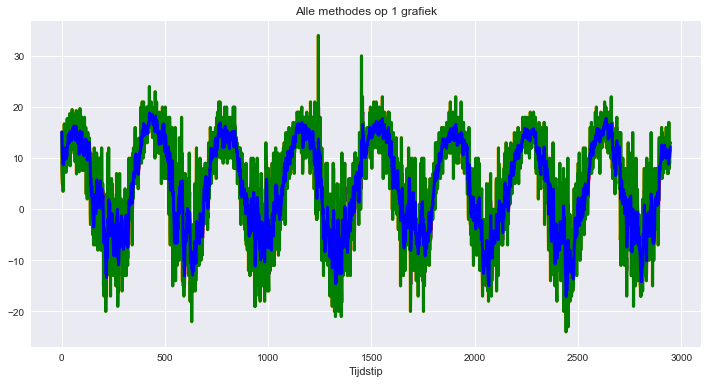

In [78]:
df['Elec_kWh'].plot(color='orange', linewidth=3, figsize=(12,6))
df['MA_10'].plot(color = 'purple', linewidth=3)
df['MA_20'].plot(color = 'pink', linewidth=3)
df['MA_50'].plot(color = 'red', linewidth=3)
df['Vorige'].plot(color = 'green', linewidth=3)
df['exp_demping'].plot(color = 'blue', linewidth=3)
plt.title('Alle methodes op 1 grafiek')

Welke methode geniet jouw voorkeur om mee te voorspellen? Argumenteer waarom.

In [79]:
print('Ook hier is de exp demping de meest correcte voorspeller met een gemiddelde abs fout van maar 4.231246003570098')

Ook hier is de exp demping de meest correcte voorspeller met een gemiddelde abs fout van maar 4.231246003570098


## <span style="color:deeppink"> Vraag 3 - Temperatuur in Barcelona </span>

Lees het bestand `yearly_average_temperature_barcelona.csv` in, gebruik de eerste kolom als index

In [80]:
df = pd.read_csv('data/yearly_average_temperature_barcelona.csv',index_col='year')
df

,average_temperature
year,
1800,14.183333
1801,14.000000
1802,14.066667
1803,13.850000
1804,14.591667
...,...
1895,15.058333
1896,14.291667
1897,15.550000


Ga na via de trendlijn of er al dan niet sprake is van een stationaire tijdreeks.

Text(0.5, 1.0, 'average_temperature')

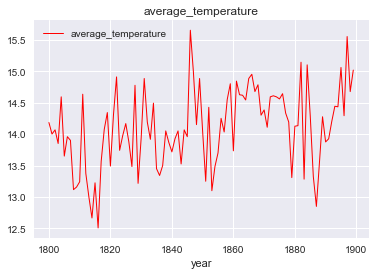

In [81]:
df.plot(color='red', linewidth=1, figsize=(6,4))
plt.title('average_temperature')

Intercept = -0.8919090909091061
Richtingcoef = 0.008106060606060615
We zien dat er een matige stijging in de grafiek zit


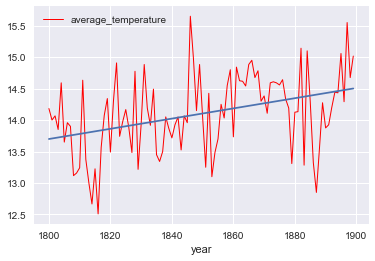

In [82]:
from sklearn.linear_model import LinearRegression

x = df.index.values
y = df['average_temperature'].values

l = LinearRegression()
l.fit(x.reshape(-1,1),y)

print(f'Intercept = {l.intercept_}')
print(f'Richtingcoef = {l.coef_[0]}')

df.plot(color='red', linewidth=1, figsize=(6,4))
sns.lineplot(x=x,y=l.predict(x.reshape(-1,1)))
print('We zien dat er een matige stijging in de grafiek zit')

Gebruik autocorrelatie om patronen te detecteren. Is er periodiciteit? Met andere woorden zijn er patronen die zich constant herhalen? Zo ja, hoelang duurt zo een patroon(ongeveer)?

Hier zien we dat er niet echt een direct patroon is


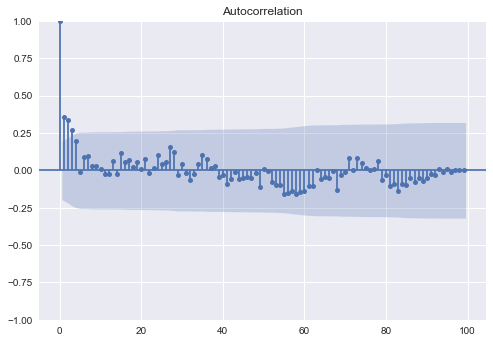

In [83]:
fig = plot_acf(df['average_temperature'],lags=len(df)-1)
print('Hier zien we dat er niet echt een direct patroon is')

Zoek een optimale techniek voor het voorspellen van de volgende sample. Je kan kiezen uit alle technieken die tot nu toe aan bod zijn gekomen:
- Volgende sample is huidige sample
- Moving average met verschillende groottes 
- Exponentiële demping. Zorg dat je de factor alfa kan aanpassen.


In [84]:
df['Vorige'] = df['average_temperature'].shift(1)
df['MA_3'] = df['average_temperature'].rolling(3).mean().shift(1)
df['MA_5'] = df['average_temperature'].rolling(5).mean().shift(1)
df['MA_10'] = df['average_temperature'].rolling(10).mean().shift(1)
df['exp_demping'] = df['average_temperature'].ewm(alpha=0.265, adjust=False).mean().shift(1)

df['ABS_MA_3'] = abs(df['average_temperature']-df['MA_3'])
df['ABS_MA_5'] = abs(df['average_temperature']-df['MA_5'])
df['ABS_MA_10'] = abs(df['average_temperature']-df['MA_10'])
df['ABS_Vorige'] = abs(df['average_temperature']-df['Vorige'])
df['ABS_exp_demping'] = abs(df['average_temperature']-df['exp_demping'])

df['PROC_MA3'] = (df['ABS_MA_3'] /df['average_temperature'])*100
df['PROC_MA5'] = (df['ABS_MA_5'] /df['average_temperature'])*100
df['PROC_MA10'] = (df['ABS_MA_10'] /df['average_temperature'])*100
df['PROC_exp'] = (df['ABS_exp_demping'] /df['average_temperature'])*100
df['PROC_vorige'] = (df['ABS_Vorige'] /df['average_temperature'])*100

stap = 1e-3
alphas = np.arange(start=0+stap,stop=1+stap,step=stap)
df2 = pd.DataFrame()
mae=[]

for alpha in alphas[0:]:
    expo = []
    expo = df['average_temperature'].ewm(alpha=alpha, adjust=False).mean().shift()
    mae.append(abs(df['average_temperature']-expo).mean())

df2['mae'] = mae
df2.set_index(alphas, inplace=True)
df2.head()
minimum_mae = df2['mae'].min()
print(f"De laagste is {df2['mae'].min()}")
print("index: ", df2[df2['mae'] == minimum_mae].index[0])

print(f"absoluut: ma3 {df['ABS_MA_3'].mean()} procentueel: {df['PROC_MA3'].mean()}")
print(f"absoluut: ma5 {df['ABS_MA_5'].mean()} procentueel: {df['PROC_MA5'].mean()}")
print(f"absoluut: ma10 {df['ABS_MA_10'].mean()} procentueel: {df['PROC_MA10'].mean()}")
print(f"absoluut: exp {df['ABS_exp_demping'].mean()} procentueel: {df['PROC_exp'].mean()}")
print(f"absoluut: vorige {df['ABS_Vorige'].mean()} procentueel: {df['PROC_vorige'].mean()}")

De laagste is 0.45016402370806285
index:  0.265
absoluut: ma3 0.46815578465063007 procentueel: 3.33317369160446
absoluut: ma5 0.4864912280701751 procentueel: 3.4670942715116464
absoluut: ma10 0.48812037037037015 procentueel: 3.461164583575556
absoluut: exp 0.45016402370806285 procentueel: 3.2037715308585577
absoluut: vorige 0.5503367003367007 procentueel: 3.909981975201738


Visualiseer de gebruikte voorspellingstechnieken in een plot

Text(0.5, 1.0, 'Alle methodes op 1 grafiek')

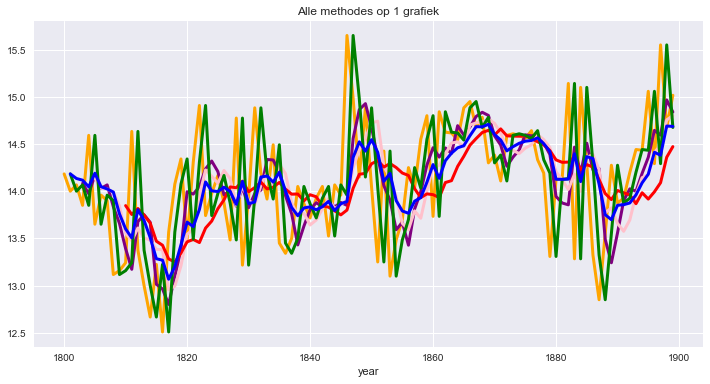

In [85]:
df['average_temperature'].plot(color='orange', linewidth=3, figsize=(12,6))
df['MA_3'].plot(color = 'purple', linewidth=3)
df['MA_5'].plot(color = 'pink', linewidth=3)
df['MA_10'].plot(color = 'red', linewidth=3)
df['Vorige'].plot(color = 'green', linewidth=3)
df['exp_demping'].plot(color = 'blue', linewidth=3)
plt.title('Alle methodes op 1 grafiek')

Welke methode geniet jouw voorkeur om mee te voorspellen? Argumenteer waarom.

In [86]:
print('Ook hier is de exp demp de beste techniek met de kleinste foutmarge')

Ook hier is de exp demp de beste techniek met de kleinste foutmarge
